In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import textblob

pd.options.display.max_rows = 30
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = 100
pd.options.display.width = 10000

%matplotlib inline

In [2]:
movies_df = pd.read_csv('/content/movies.csv')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [3]:
links_df = pd.read_csv('/content/links.csv')
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [4]:
ratings_df = pd.read_csv('/content/ratings.csv')
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
tags_df = pd.read_csv('/content/tags.csv')
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [6]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
weird_movieID = set([])
for idx in range(movies_df.shape[0]):
    if movies_df.loc[idx,'title'].count('(') != 1 :
        weird_movieID.add(idx)
    elif movies_df.loc[idx,'title'].count(')') != 1 :
        weird_movieID.add(idx)

In [8]:
movies_df.loc[weird_movieID]

<ipython-input-8-d8fba5fc29e2>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  movies_df.loc[weird_movieID]


,movieId,title,genres
2052,2731,"400 Blows, The (Les quatre cents coups) (1959)",Crime|Drama
2053,2732,Jules and Jim (Jules et Jim) (1961),Drama|Romance
4101,5878,Talk to Her (Hable con Ella) (2002),Drama|Romance
4102,5879,Eight Crazy Nights (Adam Sandler's Eight Crazy...,Animation|Comedy|Musical
8196,103235,"Best Offer, The (Migliore offerta, La) (2013)",Thriller
...,...,...,...
8180,102984,Inhuman Resources (Redd Inc.) (2012),Horror|Thriller
2038,2716,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi
4086,5839,My Father's Glory (La gloire de mon père) (1990),Adventure|Drama
4091,5849,I'm Starting From Three (Ricomincio da Tre) (1...,Comedy


In [9]:
# Separting movie title and year part using split function.
split_values = movies_df['title'].str.rsplit("(", n = 1, expand = True)
# setting 'movie_title' values to title part.
movies_df.title = split_values[0]
# creating 'release_year' column.
movies_df['release_year'] = split_values[1]
# Cleaning the release_year series.
movies_df['release_year'] = movies_df.release_year.str[0:4]

In [10]:
movies_df.head()

,movieId,title,genres,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [11]:
# Getting series of lists by applying split operation.
movies_df.genres = movies_df.genres.str.split('|')
# Getting distinct genre types for generating columns of genre type, set stores only distinct values
genre_columns = list(set([j for i in movies_df['genres'].tolist() for j in i]))
genre_columns

['Horror',
 'Action',
 'Sci-Fi',
 'Film-Noir',
 'Animation',
 'IMAX',
 'Romance',
 'Documentary',
 'Mystery',
 '(no genres listed)',
 'Musical',
 'Children',
 'Crime',
 'Thriller',
 'War',
 'Adventure',
 'Fantasy',
 'Western',
 'Comedy',
 'Drama']

In [12]:
## No need for these columns
genre_columns.remove('(no genres listed)')
genre_columns.remove('IMAX')

In [13]:
#We are trying to one-hot encode the movies genre
for j in genre_columns:
    movies_df[j] = 0
movies_df.head()

,movieId,title,genres,release_year,Horror,Action,Sci-Fi,Film-Noir,Animation,Romance,Documentary,Mystery,Musical,Children,Crime,Thriller,War,Adventure,Fantasy,Western,Comedy,Drama
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,[Comedy],1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#If the genre is in the list we made in genres column then one-hot the respective genre column
for i in range(movies_df.shape[0]):
    for j in genre_columns:
        if(j in movies_df['genres'].iloc[i]):
            movies_df.loc[i,j] = 1
        else:
            movies_df.loc[i,j] = 0

In [15]:
#make sure everything worked fine and set columns as integer value
movies_df.iloc[:,4:] = movies_df.iloc[:,4:].astype(int)
movies_df.head()

,movieId,title,genres,release_year,Horror,Action,Sci-Fi,Film-Noir,Animation,Romance,Documentary,Mystery,Musical,Children,Crime,Thriller,War,Adventure,Fantasy,Western,Comedy,Drama
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,5,Father of the Bride Part II,[Comedy],1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
movies_df.isna().sum(axis=0)

movieId          0
title            0
genres           0
release_year    12
Horror           0
Action           0
Sci-Fi           0
Film-Noir        0
Animation        0
Romance          0
Documentary      0
Mystery          0
Musical          0
Children         0
Crime            0
Thriller         0
War              0
Adventure        0
Fantasy          0
Western          0
Comedy           0
Drama            0
dtype: int64

In [17]:
## To handle missing values, release year must be converted to int
## Set the missing year values as -1 first
movies_df.loc[movies_df.isna()['release_year'],'release_year'] = -1

## Now, convert column to integer values
movies_df['release_year'] = movies_df['release_year'].astype(int)

## Now, replace with median
## Keep in mind, that -1 must NOT be considered while calculating median
year_imputer = movies_df.loc[movies_df['release_year'] != -1 , 'release_year'].median()
year_imputer = int(year_imputer)
movies_df.loc[movies_df['release_year'] == -1 , 'release_year'] = year_imputer 


In [18]:
movies_df.drop(columns=['genres'],inplace=True)

In [19]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.000
1,2,113497,8844.000
2,3,113228,15602.000
3,4,114885,31357.000
4,5,113041,11862.000


In [20]:
links_df.isna().sum()


movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [21]:
## I can not drop these directly from dataframe just yet because I have to merge the dataframes
## I will make a memory of the IDs for future
dropped_links_movieid = links_df[links_df.isna()['tmdbId']]['movieId']
links_df.dropna(axis=0,inplace=True)

In [22]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.000,964982703
1,1,3,4.000,964981247
2,1,6,4.000,964982224
3,1,47,5.000,964983815
4,1,50,5.000,964982931


In [23]:
ratings_df.isna().sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [24]:
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [25]:
tags_df['tag'] = tags_df.tag.str.lower()

In [26]:
for i,j in tags_df.iterrows():
    tag = j.tag
    tag_correct = re.sub(r' \([^)]*\)','',tag)
    if 'based' or '-' in tag_correct:
        tags_df.loc[i,'tag'] = tag_correct
        continue
    if re.findall(r'\b\w{2}\b',tag_correct) or re.findall(r'\b\w{1}\b',tag_correct):
        tags_df.loc[i,'tag'] = np.NaN
    elif tag == tag_correct:
        continue
    else:
        tags_df.loc[i,'tag'] = tag_correct
        pass

tags_df = tags_df.dropna()   

In [27]:
tags_df.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,boxing story,1445715207
4,2,89774,mma,1445715200
5,2,89774,tom hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,leonardo dicaprio,1445715051
8,2,106782,martin scorsese,1445715056
9,7,48516,way too long,1169687325


In [28]:
tags_df.drop(columns=['timestamp'],inplace=True)

In [29]:
tags_df.isna().sum(axis=0)

userId     0
movieId    0
tag        0
dtype: int64

<Axes: >

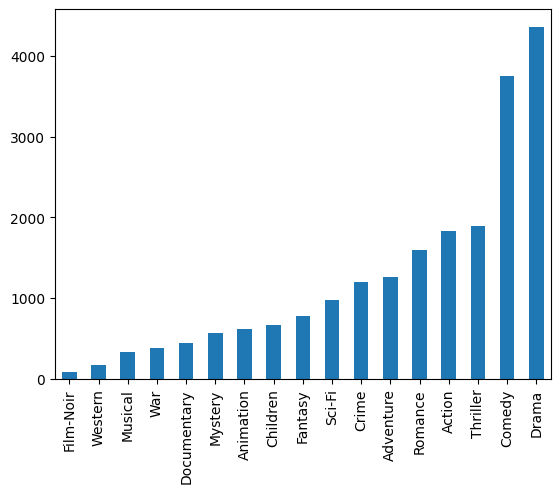

In [30]:
genre_counts = movies_df.iloc[:,4:].sum(axis=0).sort_values()
genre_counts.plot(kind='bar')

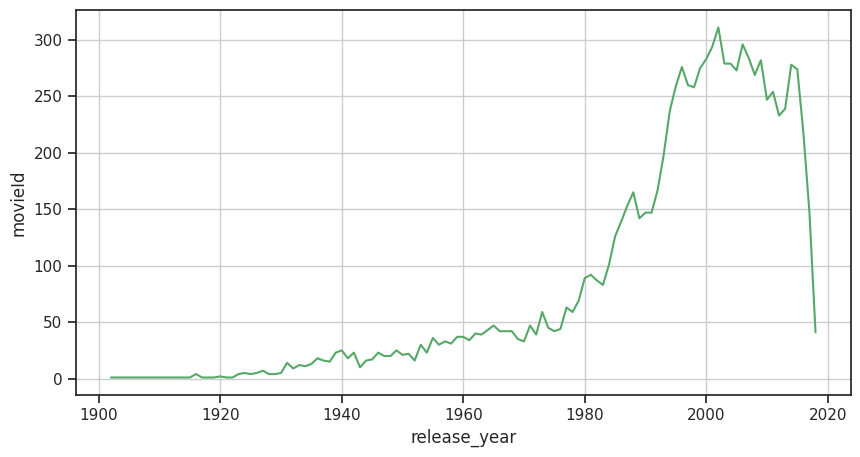

In [31]:
plt.rcParams["figure.figsize"] = (10,5)
dftmp = movies_df[['movieId', 'release_year']].groupby('release_year')
sns.set(style="ticks")
sns.lineplot(x = dftmp.release_year.first(), y = dftmp.movieId.nunique(),markers='o',color='g')
plt.grid()

In [32]:
## Calculate Average Mean Ratings of Every Movie
movie_ratings = ratings_df.groupby(by ='movieId')['rating'].mean()


In [33]:
## Create a new Dataframe
mov_temp = movies_df[['movieId','title']]
rat_temp = movie_ratings
movies_ratings = mov_temp.merge(rat_temp, on='movieId' , how = 'left')
movies_ratings.head()

,movieId,title,rating
0,1,Toy Story,3.921
1,2,Jumanji,3.432
2,3,Grumpier Old Men,3.260
3,4,Waiting to Exhale,2.357
4,5,Father of the Bride Part II,3.071


<Axes: xlabel='rating', ylabel='Count'>

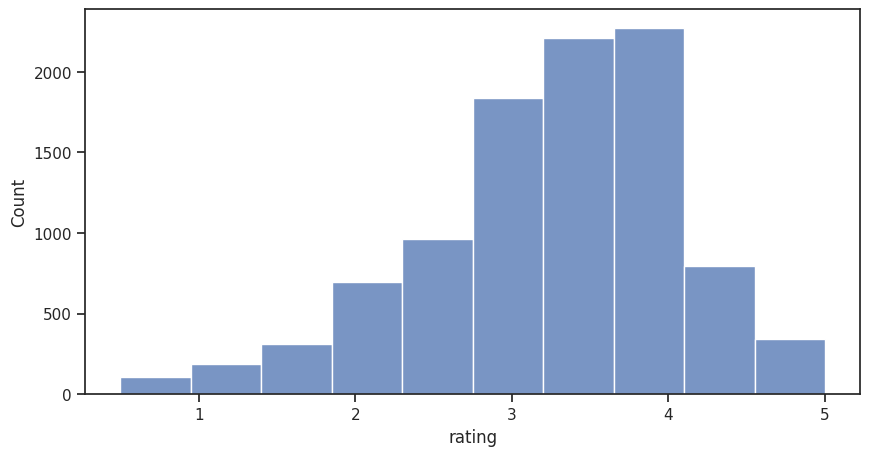

In [34]:

sns.histplot(data=movies_ratings['rating'],bins=10)

In [35]:
movies_ratings['rating_cnt'] = 0
movie_ratings_cnt = ratings_df.groupby(by ='movieId')['rating'].count()

movies_ratings_cnt = mov_temp.merge(movie_ratings_cnt, on='movieId' , how = 'left')
movies_ratings_cnt.head()

movies_ratings['rating_cnt'] = movies_ratings_cnt['rating'].fillna(0).astype(int)
movies_ratings

,movieId,title,rating,rating_cnt
0,1,Toy Story,3.921,215
1,2,Jumanji,3.432,110
2,3,Grumpier Old Men,3.260,52
3,4,Waiting to Exhale,2.357,7
4,5,Father of the Bride Part II,3.071,49
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,4.000,1
9738,193583,No Game No Life: Zero,3.500,1
9739,193585,Flint,3.500,1
9740,193587,Bungo Stray Dogs: Dead Apple,3.500,1


<Axes: xlabel='rating_cnt', ylabel='Count'>

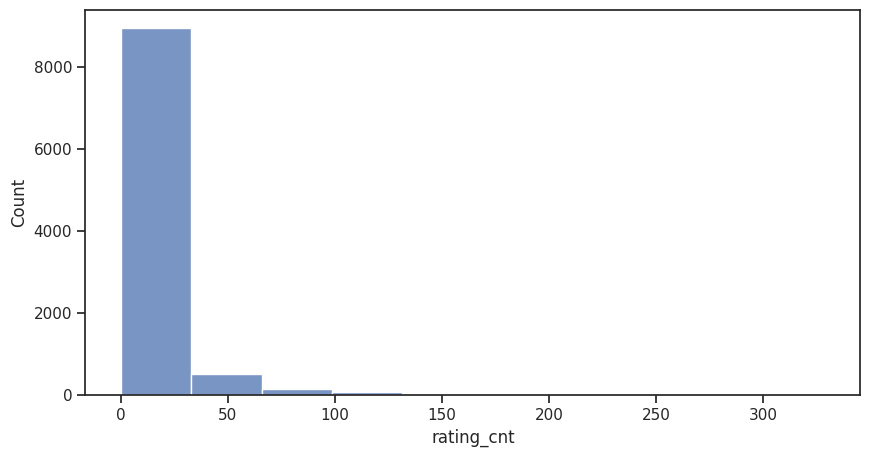

In [36]:
sns.histplot(data=movies_ratings['rating_cnt'],bins=10)

In [37]:
movies_df.to_csv('movie_genres.csv',index=False)
tags_df.to_csv('movie_tags.csv',index=False)

In [38]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095424 sha256=571f189496ef0fdb5bd6f601d70fbf7591c08b711b72d795e8548a36f045a003
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import SVDpp
from surprise import Dataset
from surprise import Reader
from surprise import dump
from surprise import accuracy

import pickle

import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_rows = 30
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = 100
pd.options.display.width = 10000

%matplotlib inline

In [40]:
movie_genres = pd.read_csv('/content/movie_genres.csv',index_col='movieId')
movie_genres.drop(columns=['title','release_year'], inplace = True)
movie_genres.head()

,Horror,Action,Sci-Fi,Film-Noir,Animation,Romance,Documentary,Mystery,Musical,Children,Crime,Thriller,War,Adventure,Fantasy,Western,Comedy,Drama
movieId,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [41]:
movie_titles = pd.read_csv('/content/movies.csv')
movie_titles.drop(columns=['genres'],inplace = True)
movie_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [42]:
movie_titles.shape

(9742, 2)

In [43]:
movie_tags = pd.read_csv('/content/movie_tags.csv')
movie_tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,highly quotable
2,2,60756,will ferrell
3,2,89774,boxing story
4,2,89774,mma


In [44]:
movie_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userId   3683 non-null   int64 
 1   movieId  3683 non-null   int64 
 2   tag      3683 non-null   object
dtypes: int64(2), object(1)
memory usage: 86.4+ KB


In [45]:
def get_polarity(df = pd.DataFrame([])):
    df['polarity'] = 0
    
    for i in range(df.shape[0]):
        res_i = TextBlob(df.loc[i,'tag'])
        df.loc[i,'polarity'] = res_i.sentiment.polarity
        
    return df['polarity']

In [46]:
movie_tags['polarity'] = get_polarity(movie_tags)

In [47]:
movie_tags.head(5)

,userId,movieId,tag,polarity
0,2,60756,funny,0.250
1,2,60756,highly quotable,0.160
2,2,60756,will ferrell,0.000
3,2,89774,boxing story,0.000
4,2,89774,mma,0.000


In [48]:
print("range of polarity {1:2f} TO {0:2f}".format(movie_tags['polarity'].describe()['max'] ,movie_tags['polarity'].describe()['min']))

range of polarity -1.000000 TO 1.000000


In [49]:
movie_tags.loc[movie_tags['polarity'] < 0] = 0 
movie_tags['polarity'] = movie_tags['polarity']*5
print("range of polarity {1:2f} to {0:2f}".format(movie_tags['polarity'].describe()['max'] ,movie_tags['polarity'].describe()['min']))

range of polarity 0.000000 to 5.000000


In [50]:
user_ratings = pd.read_csv('/content/ratings.csv')
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [51]:
user_ratings.drop(columns=['timestamp'],inplace=True)
user_ratings['rating'] = user_ratings['rating'].astype(int)
user_ratings.head()

,userId,movieId,rating
0,1,1,4
1,1,3,4
2,1,6,4
3,1,47,5
4,1,50,5


In [52]:
min_rating = user_ratings['rating'].describe()['min']
max_rating = user_ratings['rating'].describe()['max']
print(min_rating , " to " ,  max_rating)

0.0  to  5.0


In [53]:
data_reader = Reader(rating_scale=(min_rating,max_rating))
data = Dataset.load_from_df(user_ratings, data_reader)

In [54]:
benchmark = []
# Iterate over all algorithms
from surprise import SVD
from surprise import SlopeOne
from surprise import NormalPredictor
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering


algorithms = [SVD(), SlopeOne(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

print ("Attempting: ", str(algorithms), '\n\n\n')

for algorithm in algorithms:
    print("Starting: " ,str(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    print("Done: " ,str(algorithm), "\n\n")

print ('\n\tDONE\n')

Attempting:  [<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f4c5f7ba290>, <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7f4c5f7b8df0>, <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f4c5f7b9060>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7f4c5f7b9ff0>, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f4c5f7b9d80>, <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7f4c5f7ba380>, <surprise.prediction_algorithms.knns.KNNWithZScore object at 0x7f4c5f7b92d0>, <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7f4c5f7bbb50>, <surprise.prediction_algorithms.co_clustering.CoClustering object at 0x7f4c5f7bbfa0>] 



Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f4c5f7ba290>
Done:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f4c5f7ba290> 


Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object a

In [55]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results.sort_values(by = 'test_rmse')

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.917,0.332,0.215
SVD,0.922,1.790,0.378
KNNBaseline,0.926,0.467,2.774
KNNWithZScore,0.948,0.218,2.904
KNNWithMeans,0.950,0.127,2.748
SlopeOne,0.952,6.008,18.947
CoClustering,0.977,3.301,0.264
KNNBasic,1.008,0.123,2.521
NormalPredictor,1.497,0.200,0.453


In [56]:
trainset , testset = train_test_split(data = data , test_size=0.2, random_state=42)

In [57]:
for algorithm in algorithms:
    
    ## fit the algorithm to trainset
    algorithm.fit(trainset)
    
    ## save the mode
    name = str(algorithm).split(' ')[0].split('.')[-1]
    path = '/content/data_saved_models' + name
    dump.dump(path)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [58]:

print("users : " , trainset.n_users)
print("movies : " , trainset.n_items)

users :  610
movies :  8928


In [59]:
similarity_config_item_based = {
    'name':'cosine', 
    'user_based': False, 
    'min_support' : 3
    }

similarity_config_user_based = {
    'name':'cosine', 
    'user_based': True, 
    'min_support' : 3
    }

In [60]:
algo_item_based = KNNWithMeans(
    k = 15,
    min_k = 5, 
    sim_option = similarity_config_item_based
    )

In [61]:
algo_item_based.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [62]:
# Train the algorithm on the trainset, and predict ratings for the testset
predictions = algo_item_based.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9464


0.946368595043037

In [63]:
algo_user_based = KNNWithMeans(
    k = 15,
    min_k = 1, 
    sim_option = similarity_config_user_based
    )
algo_user_based.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [64]:
# Train the algorithm on the trainset, and predict ratings for the testset
predictions = algo_user_based.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9540


0.9540140708883638

In [65]:
dump.dump('/content/data_saved_modelsKNNWithMeans', algo=algo_item_based)
dump.dump('data_saved_models/knnwithmeans_user', algo=algo_user_based)

In [66]:
## check our similarity matrix

sim_matrix = algo_item_based.sim
sim_matrix.shape

(610, 610)

In [67]:
algo_user_based.sim.shape

(610, 610)

In [68]:
algo_user_based.predict(1,3)
algo_user_based.predict(1,3).details['actual_k']
algo_user_based.predict(1,3).est
top_rated = user_ratings['movieId'].value_counts()
top_rated[top_rated.gt(100)].index

Int64Index([ 356,  318,  296,  593, 2571,  260,  480,  110,  589,  527,
            ...
             357,  161, 2706,  778, 5816, 1222,    6,  292,  454,  434], dtype='int64', length=134)

In [69]:
## Select movies that have been rated at least 100 times
top_rated = user_ratings['movieId'].value_counts()
top_rated = user_ratings[user_ratings['movieId'].isin(top_rated[top_rated.gt(100)].index)]

## Select Top Rated
top_rated = top_rated.groupby(by = 'movieId')['rating'].mean().sort_values(ascending=False)
top_rated = pd.DataFrame(top_rated,columns=['rating'])
top_rated.reset_index(inplace=True)
top_rated.head()

,movieId,rating
0,318,4.328
1,858,4.182
2,1221,4.147
3,260,4.131
4,1208,4.112


In [70]:
top_rated.to_csv('/content/data_saved_models/top_rated.csv', index=False)
temp = pd.read_csv('/content/data_saved_models/top_rated.csv')
temp.head()

,movieId,rating
0,318,4.328
1,858,4.182
2,1221,4.147
3,260,4.131
4,1208,4.112


In [71]:
def top_recommendatations(user_ratings , gt = 100 , k = 30):
    
    ## Select movies that have been rated at least 100 times
    top_rated = user_ratings['movieId'].value_counts()
    top_rated = user_ratings[user_ratings['movieId'].isin(top_rated[top_rated.gt(gt)].index)]
    
    ## Select Top Rated
    top_rated = top_rated.groupby(by = 'movieId')['rating'].mean().sort_values(ascending=False)
    top_rated = pd.DataFrame(top_rated,columns=['rating'])
    top_rated.reset_index(inplace=True)
    top_rated = top_rated[0:k]
    
    return top_rated['movieId']

In [72]:
def get_mv_titles(mv_titles = None, mv_id = None):
    """
    given a list of movie IDs, returns their titles
    """
    titles = []
    for idx in mv_id:
        titles.append(mv_titles.loc[mv_titles['movieId'] == idx]['title'].values[0])
    
    return titles

In [73]:
temp = top_recommendatations(user_ratings)
get_mv_titles(movie_titles, temp)

['Shawshank Redemption, The (1994)',
 'Godfather, The (1972)',
 'Godfather: Part II, The (1974)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Apocalypse Now (1979)',
 'Fight Club (1999)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Goodfellas (1990)',
 'Usual Suspects, The (1995)',
 "Schindler's List (1993)",
 'Pulp Fiction (1994)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'Reservoir Dogs (1992)',
 'Princess Bride, The (1987)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'Matrix, The (1999)',
 "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",
 'Forrest Gump (1994)',
 'Silence of the Lambs, The (1991)',
 'Dark Knight, The (2008)',
 'American History X (1998)',
 'Departed, The (2006)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Monty Python and the Holy Grail (1975)',
 'Fargo (1996)',
 'Saving Private Ryan (1998)',
 'Taxi Driver (1976)',
 'Green Mile, The (1999)',
 'Full Metal Jacket (1987)',
 'Eternal Suns

In [74]:
temp1 = pd.read_csv('/content/movie_genres.csv')
temp1.columns


Index(['movieId', 'title', 'release_year', 'Horror', 'Action', 'Sci-Fi', 'Film-Noir', 'Animation', 'Romance', 'Documentary', 'Mystery', 'Musical', 'Children', 'Crime', 'Thriller', 'War', 'Adventure', 'Fantasy', 'Western', 'Comedy', 'Drama'], dtype='object')

In [75]:
from scipy.spatial.distance import cdist
## Calculate the cosine similarity matrix for the dataset of all movies
temp = pd.read_csv('/content/movie_generated.csv')
temp = temp.drop(columns=['release_year','title','movieId'])

## similarity = 1 - cosine distance
sim_mat_genre = 1 - cdist(temp,temp,'cosine')



In [76]:
movie_generated = pd.read_csv('/content/movie_generated.csv')

In [77]:
## Convert to Dataframe
sim_mat_genre = pd.DataFrame(sim_mat_genre,index=movie_generated['movieId'], columns=movie_generated['movieId'])
sim_mat_genre.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,...,184471,184641,184721,184791,184931,184987,184997,185029,185031,185033,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000,0.775,0.316,0.258,0.447,0.000,0.316,0.632,0.000,0.258,0.258,0.316,0.775,0.000,0.258,0.000,0.000,0.447,0.447,0.200,0.258,0.000,0.000,0.000,0.000,0.000,0.316,0.000,0.400,0.000,0.000,0.000,0.316,0.000,0.632,0.316,0.000,0.000,0.000,0.000,0.516,0.258,0.000,0.000,0.400,0.000,0.000,0.258,0.316,0.632,...,0.516,0.516,0.000,0.447,0.000,0.671,0.316,0.000,0.316,0.258,0.000,0.316,0.447,0.258,0.258,0.200,0.671,0.258,0.447,0.000,0.516,0.600,0.000,0.316,0.447,0.775,0.316,0.000,0.258,0.000,0.000,0.258,0.000,0.000,0.447,0.000,0.000,0.447,0.000,0.447,0.447,0.316,0.316,0.447,0.000,0.671,0.775,0.000,0.316,0.447
2,0.775,1.000,0.000,0.000,0.000,0.000,0.000,0.816,0.000,0.333,0.000,0.000,0.667,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.408,0.000,0.516,0.000,0.000,0.000,0.408,0.000,0.408,0.000,0.000,0.000,0.000,0.000,0.667,0.000,0.000,0.000,0.258,0.000,0.000,0.000,0.408,0.408,...,0.667,0.667,0.000,0.000,0.000,0.866,0.000,0.000,0.408,0.333,0.000,0.000,0.000,0.333,0.333,0.258,0.577,0.000,0.577,0.000,0.333,0.516,0.000,0.000,0.000,0.667,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.289,0.000,0.000,0.000,0.000,0.000,0.289,0.333,0.000,0.000,0.000
3,0.316,0.000,1.000,0.816,0.707,0.000,1.000,0.000,0.000,0.000,0.816,0.500,0.000,0.000,0.408,0.000,0.500,0.707,0.707,0.316,0.408,0.000,0.000,0.000,0.500,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.500,1.000,0.000,0.000,0.000,0.000,0.000,0.408,0.500,0.000,0.316,0.500,0.000,0.816,0.000,0.500,...,0.000,0.000,0.000,0.707,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.500,0.707,0.000,0.000,0.000,0.000,0.408,0.000,0.000,0.408,0.316,0.000,1.000,0.707,0.408,0.500,0.000,0.000,0.000,0.000,0.408,0.000,0.500,0.707,0.000,0.000,0.000,0.000,0.354,0.354,0.000,0.500,0.000,0.000,0.354,0.408,0.000,0.000,0.707
4,0.258,0.000,0.816,1.000,0.577,0.000,0.816,0.000,0.000,0.000,1.000,0.408,0.000,0.577,0.333,0.408,0.816,0.577,0.577,0.516,0.333,0.258,0.000,0.408,0.816,0.577,0.408,0.816,0.258,0.408,0.577,0.000,0.408,0.408,0.408,0.816,0.577,0.408,0.333,0.577,0.000,0.667,0.816,0.000,0.516,0.816,0.000,1.000,0.408,0.408,...,0.000,0.000,0.408,0.577,0.289,0.000,0.816,0.333,0.000,0.333,0.000,0.408,0.577,0.000,0.000,0.258,0.000,0.333,0.000,0.000,0.333,0.258,0.408,0.816,0.577,0.333,0.816,0.000,0.000,0.000,0.000,0.667,0.000,0.816,0.577,0.577,0.577,0.000,0.000,0.289,0.289,0.408,0.816,0.000,0.000,0.289,0.333,0.577,0.000,0.577
5,0.447,0.000,0.707,0.577,1.000,0.000,0.707,0.000,0.000,0.000,0.577,0.707,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.447,0.577,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.707,0.707,0.000,0.000,0.000,0.000,0.000,0.577,0.000,0.000,0.000,0.000,0.000,0.577,0.000,0.707,...,0.000,0.000,0.000,1.000,0.000,0.000,0.707,0.000,0.000,0.000,0.000,0.707,1.000,0.000,0.000,0.000,0.000,0.577,0.000,0.000,0.577,0.447,0.000,0.707,1.000,0.577,0.707,0.000,0.000,0.000,0.000,0.577,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.500,0.500,0.000,0.707,0.000,0.000,0.500,0.577,0.000,0.000,1.000


In [78]:
sim_mat_genre.shape

(9742, 9742)

In [79]:
sim_mat_genre.isna().sum()
sim_mat_genre.to_csv('/content/data_saved_models/similarity_matrix_genre.csv')

In [80]:
def get_similar_movies_genres(k = 20 , mv_id = None, sim_mat = None):
    """
    returns movies similar to a given movie ID
    useful for making recommendations after a user has finished watching a particular movie 
    OR
    when user searches for a particular movie
    """
    temp = sim_mat.loc[:,mv_id].sort_values(ascending=False)[:k]
    temp = temp[temp.index != mv_id]
    
    return temp.index

In [81]:
get_mv_titles(movie_titles, get_similar_movies_genres(20,1,sim_mat_genre)) #recommendation for Toy Story

['Toy Story 3 (2010)',
 'Ant Bully, The (2006)',
 'Tale of Despereaux, The (2008)',
 'Wild, The (2006)',
 'Toy Story 2 (1999)',
 'Turbo (2013)',
 'Monsters, Inc. (2001)',
 'The Good Dinosaur (2015)',
 'Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 'Asterix and the Vikings (Astérix et les Vikings) (2006)',
 'Antz (1998)',
 'Moana (2016)',
 "Emperor's New Groove, The (2000)",
 'Shrek the Third (2007)',
 'Inside Out (2015)',
 'Home (2015)',
 "Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)",
 'Valiant (2005)']

In [82]:
get_mv_titles(movie_titles, get_similar_movies_genres(20,592,sim_mat_genre)) #recommendation for Batman

['F/X (1986)',
 'Bourne Ultimatum, The (2007)',
 'French Connection, The (1971)',
 'Blitz (2011)',
 'Coffy (1973)',
 'Redemption (Hummingbird) (2013)',
 'xXx (2002)',
 'Fast & Furious 6 (Fast and the Furious 6, The) (2013)',
 'Hitman (2007)',
 'Kill Bill: Vol. 1 (2003)',
 'Bourne Supremacy, The (2004)',
 'Furious 7 (2015)',
 'Good Day to Die Hard, A (2013)',
 'Last Stand, The (2013)',
 'Poker Night (2014)',
 'Riki-Oh: The Story of Ricky (Lik Wong) (1991)',
 'U.S. Marshals (1998)',
 'Bank Job, The (2008)',
 'Jack Reacher (2012)',
 'Replacement Killers, The (1998)']

In [83]:
get_mv_titles(movie_titles, get_similar_movies_genres(20,318,sim_mat_genre)) #recommendation for Shawshank Redemption

['Baby Boy (2001)',
 'Virgin Spring, The (Jungfrukällan) (1960)',
 'Boyz N the Hood (1991)',
 'Bugsy (1991)',
 'We Own the Night (2007)',
 "No Man's Land (1987)",
 'Young and the Damned, The (Olvidados, Los) (1950)',
 'Funeral, The (1996)',
 "Child, The (L'enfant) (2005)",
 'Above the Rim (1994)',
 "Young Poisoner's Handbook, The (1995)",
 'T2: Trainspotting (2017)',
 '12 Angry Men (1997)',
 'Crash (2004)',
 'Battles Without Honor & Humanity (Jingi naki tatakai) (1973)',
 'Yards, The (2000)',
 'Pierrot le fou (1965)',
 'Boy A (2007)',
 'Fireworks (Hana-bi) (1997)',
 'Polytechnique (2009)']